In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
review=pd.read_excel('review형태소.xlsx')
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57364 entries, 0 to 57363
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품명     57364 non-null  object
 1   평점      57364 non-null  int64 
 2   리뷰내용    57363 non-null  object
 3   리뷰명사    57364 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.8+ MB


In [3]:
review.head()

,상품명,평점,리뷰내용,리뷰명사
0,라벨르 베이직셔츠,5,두께도 적당하고 디자인 색감 다 맘에 들어오 \n가격도 저렴하고 잘산것같아요!! 담...,"['두께', '디자인', '색감', '맘', '가격', '담', '색도']"
1,라벨르 베이직셔츠,4,딱 기본 셔츠하게 좋아요! 부들부들한데 너무 빳빳한 소재도 아닌게 딱 여리해보이고 ...,"['기본', '셔츠', '빳빳', '소재', '여리해', '보이', '생각', '안..."
2,라벨르 베이직셔츠,5,청바지에도 어울리고 슬랙스에도 어울리고 좋아요 !!,"['청바지', '슬랙스']"
3,라벨르 베이직셔츠,5,청바지에 입어도 예쁘고 치마랑 입어도 예뻐요!! 카라가 커서 기본템이어도 마냥 무난...,"['청바지', '치마', '카라', '커서', '기본', '템', '이어도', '마..."
4,라벨르 베이직셔츠,4,보들보들하니 딱 좋아용 ㅎ 소재 특성상 주름은 어쩔수 없지만 너무 예뻐요 자켓이랑 ...,"['소재', '특성', '주름', '수', '자켓', '더', '아유']"


# 평점, 리뷰 감성분석

### 1) 평점이 3점인 데이터를 제거하여 새로운 데이터를 만든 다음, 평점을 기준으로 1,2점은 부정 / 4,5점은 긍정으로 나눔

### 2) 1)번 데이터를 바탕으로 회귀, 분류 방법을 사용하여 train_test_split 수행
#### train=1,2,4,5점, test=3점

### 3) 2)번 데이터를 바탕으로 각 긍정, 부정에는 어떤 단어들이 주로 사용되었는지 파악함

------------------------------------------------------------------------

### 1) 평점이 3점인 데이터를 제거하여 새로운 데이터를 만든 다음, 평점을 기준으로 1,2점은 부정 / 4,5점은 긍정으로 나눔

In [4]:
review.head()

,상품명,평점,리뷰내용,리뷰명사
0,라벨르 베이직셔츠,5,두께도 적당하고 디자인 색감 다 맘에 들어오 \n가격도 저렴하고 잘산것같아요!! 담...,"['두께', '디자인', '색감', '맘', '가격', '담', '색도']"
1,라벨르 베이직셔츠,4,딱 기본 셔츠하게 좋아요! 부들부들한데 너무 빳빳한 소재도 아닌게 딱 여리해보이고 ...,"['기본', '셔츠', '빳빳', '소재', '여리해', '보이', '생각', '안..."
2,라벨르 베이직셔츠,5,청바지에도 어울리고 슬랙스에도 어울리고 좋아요 !!,"['청바지', '슬랙스']"
3,라벨르 베이직셔츠,5,청바지에 입어도 예쁘고 치마랑 입어도 예뻐요!! 카라가 커서 기본템이어도 마냥 무난...,"['청바지', '치마', '카라', '커서', '기본', '템', '이어도', '마..."
4,라벨르 베이직셔츠,4,보들보들하니 딱 좋아용 ㅎ 소재 특성상 주름은 어쩔수 없지만 너무 예뻐요 자켓이랑 ...,"['소재', '특성', '주름', '수', '자켓', '더', '아유']"


In [5]:
review1245=review['평점'] !=3 
reviewnp=review[review1245] #train

In [6]:
reviewnp['평점'].value_counts()

5    42491
4     9989
2      518
1      420
Name: 평점, dtype: int64

In [7]:
review3=review['평점']==3
review_3=review[review3] #test

In [8]:
review_3.head()

,상품명,평점,리뷰내용,리뷰명사
43,로망드 라운드카라 롱원피스,3,디자인 깔끔하고 바이올렛 컬러도 예뻐요\n가슴부분이 타이트한건 아쉽네요ㅠㅠ\n글래머...,"['디자인', '바이올렛', '컬러', '가슴', '부분', '타이', '트', '..."
65,로망드 라운드카라 롱원피스,3,타이트한 핏이구요 생각보다 소재가 너무 얇네요 ㅠ 라인이 다 드러나요 ㅠ 옷은 단정...,"['타이트', '핏이구', '생각', '소재', '라인', '옷']"
67,로망드 라운드카라 롱원피스,3,사진보고 홀딱반해서 샀는데 아쉬운부분이있당\n색은 사진보다 더 밝고 연함 사진처럼 ...,"['사진', '보고', '홀딱', '부분', '색', '사진', '더', '사진',..."
86,로망드 라운드카라 롱원피스,3,디자인 깔끔하고 바이올렛 컬러도 예뻐요\n가슴부분이 타이트한건 아쉽네요ㅠㅠ\n글래머...,"['디자인', '바이올렛', '컬러', '가슴', '부분', '타이', '트', '..."
108,로망드 라운드카라 롱원피스,3,타이트한 핏이구요 생각보다 소재가 너무 얇네요 ㅠ 라인이 다 드러나요 ㅠ 옷은 단정...,"['타이트', '핏이구', '생각', '소재', '라인', '옷']"


In [9]:
reviewnp['긍부정분류'] = [-1 if s <3 else 1 for s in reviewnp['평점']]
reviewnp

<ipython-input-9-97a9f8d2e150>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviewnp['긍부정분류'] = [-1 if s <3 else 1 for s in reviewnp['평점']]


,상품명,평점,리뷰내용,리뷰명사,긍부정분류
0,라벨르 베이직셔츠,5,두께도 적당하고 디자인 색감 다 맘에 들어오 \n가격도 저렴하고 잘산것같아요!! 담...,"['두께', '디자인', '색감', '맘', '가격', '담', '색도']",1
1,라벨르 베이직셔츠,4,딱 기본 셔츠하게 좋아요! 부들부들한데 너무 빳빳한 소재도 아닌게 딱 여리해보이고 ...,"['기본', '셔츠', '빳빳', '소재', '여리해', '보이', '생각', '안...",1
2,라벨르 베이직셔츠,5,청바지에도 어울리고 슬랙스에도 어울리고 좋아요 !!,"['청바지', '슬랙스']",1
3,라벨르 베이직셔츠,5,청바지에 입어도 예쁘고 치마랑 입어도 예뻐요!! 카라가 커서 기본템이어도 마냥 무난...,"['청바지', '치마', '카라', '커서', '기본', '템', '이어도', '마...",1
4,라벨르 베이직셔츠,4,보들보들하니 딱 좋아용 ㅎ 소재 특성상 주름은 어쩔수 없지만 너무 예뻐요 자켓이랑 ...,"['소재', '특성', '주름', '수', '자켓', '더', '아유']",1
...,...,...,...,...,...
57359,힙스 조거팬츠,5,레깅스 말고도 편하게 입고 다닐만한 팬츠 찾고 있었어욤 \n대만족 입니당,"['레깅스', '팬츠', '욤', '만족']",1
57360,힙스 조거팬츠,5,착용감이 좋고 핏이 이뻐요 강추합니다\n\n\n(2020-09-22 22:17:22...,"['착용', '감', '핏', '강', '등록', '네이버', '페이', '구매',...",1
57361,힙스 조거팬츠,5,편하게 입기좋아요 티랑 같이구매했는데 딱이에요 편하고 핏도이뻐요,"['티', '구매', '핏']",1
57362,힙스 조거팬츠,5,편하게입고잇습니다~\n\n(2020-08-29 22:49:28 에 등록된 네이버 페...,"['등록', '네이버', '페이', '구매', '평']",1


In [10]:
reviewnp2=reviewnp.copy()
reviewnp2

,상품명,평점,리뷰내용,리뷰명사,긍부정분류
0,라벨르 베이직셔츠,5,두께도 적당하고 디자인 색감 다 맘에 들어오 \n가격도 저렴하고 잘산것같아요!! 담...,"['두께', '디자인', '색감', '맘', '가격', '담', '색도']",1
1,라벨르 베이직셔츠,4,딱 기본 셔츠하게 좋아요! 부들부들한데 너무 빳빳한 소재도 아닌게 딱 여리해보이고 ...,"['기본', '셔츠', '빳빳', '소재', '여리해', '보이', '생각', '안...",1
2,라벨르 베이직셔츠,5,청바지에도 어울리고 슬랙스에도 어울리고 좋아요 !!,"['청바지', '슬랙스']",1
3,라벨르 베이직셔츠,5,청바지에 입어도 예쁘고 치마랑 입어도 예뻐요!! 카라가 커서 기본템이어도 마냥 무난...,"['청바지', '치마', '카라', '커서', '기본', '템', '이어도', '마...",1
4,라벨르 베이직셔츠,4,보들보들하니 딱 좋아용 ㅎ 소재 특성상 주름은 어쩔수 없지만 너무 예뻐요 자켓이랑 ...,"['소재', '특성', '주름', '수', '자켓', '더', '아유']",1
...,...,...,...,...,...
57359,힙스 조거팬츠,5,레깅스 말고도 편하게 입고 다닐만한 팬츠 찾고 있었어욤 \n대만족 입니당,"['레깅스', '팬츠', '욤', '만족']",1
57360,힙스 조거팬츠,5,착용감이 좋고 핏이 이뻐요 강추합니다\n\n\n(2020-09-22 22:17:22...,"['착용', '감', '핏', '강', '등록', '네이버', '페이', '구매',...",1
57361,힙스 조거팬츠,5,편하게 입기좋아요 티랑 같이구매했는데 딱이에요 편하고 핏도이뻐요,"['티', '구매', '핏']",1
57362,힙스 조거팬츠,5,편하게입고잇습니다~\n\n(2020-08-29 22:49:28 에 등록된 네이버 페...,"['등록', '네이버', '페이', '구매', '평']",1


In [11]:
reviewnp2.loc[:,'상품명'] = reviewnp2.loc[:,'상품명'].astype('category').cat.codes
reviewnp2.loc[:,'리뷰내용'] = reviewnp2.loc[:,'리뷰내용'].astype('category').cat.codes
reviewnp2.loc[:,'리뷰명사'] = reviewnp2.loc[:,'리뷰명사'].astype('category').cat.codes

In [12]:
reviewnp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53418 entries, 0 to 57363
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   상품명     53418 non-null  int16
 1   평점      53418 non-null  int64
 2   리뷰내용    53418 non-null  int32
 3   리뷰명사    53418 non-null  int32
 4   긍부정분류   53418 non-null  int64
dtypes: int16(1), int32(2), int64(2)
memory usage: 1.7 MB


In [13]:
from sklearn.model_selection import train_test_split
x=reviewnp2.drop(columns=['긍부정분류'])
y=reviewnp2['긍부정분류']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((42734, 4), (10684, 4), (42734,), (10684,))

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
lr=LogisticRegression()

#DecisionTree 학습/예측/평가
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)
print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test,dt_pred)))

#RandomForest 학습/예측/평가
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
print('RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test,rf_pred)))

#LogisticRegression 학습/예측/평가
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
print('LogiscticRegression 정확도 : {0:.4f}'.format(accuracy_score(y_test,lr_pred)))

DecisionTreeClassifier 정확도 : 1.0000
RandomForestClassifier 정확도 : 1.0000
LogiscticRegression 정확도 : 1.0000


C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
review_3

,상품명,평점,리뷰내용,리뷰명사
43,로망드 라운드카라 롱원피스,3,디자인 깔끔하고 바이올렛 컬러도 예뻐요\n가슴부분이 타이트한건 아쉽네요ㅠㅠ\n글래머...,"['디자인', '바이올렛', '컬러', '가슴', '부분', '타이', '트', '..."
65,로망드 라운드카라 롱원피스,3,타이트한 핏이구요 생각보다 소재가 너무 얇네요 ㅠ 라인이 다 드러나요 ㅠ 옷은 단정...,"['타이트', '핏이구', '생각', '소재', '라인', '옷']"
67,로망드 라운드카라 롱원피스,3,사진보고 홀딱반해서 샀는데 아쉬운부분이있당\n색은 사진보다 더 밝고 연함 사진처럼 ...,"['사진', '보고', '홀딱', '부분', '색', '사진', '더', '사진',..."
86,로망드 라운드카라 롱원피스,3,디자인 깔끔하고 바이올렛 컬러도 예뻐요\n가슴부분이 타이트한건 아쉽네요ㅠㅠ\n글래머...,"['디자인', '바이올렛', '컬러', '가슴', '부분', '타이', '트', '..."
108,로망드 라운드카라 롱원피스,3,타이트한 핏이구요 생각보다 소재가 너무 얇네요 ㅠ 라인이 다 드러나요 ㅠ 옷은 단정...,"['타이트', '핏이구', '생각', '소재', '라인', '옷']"
...,...,...,...,...
57266,히나 시스루 자수블라우스,3,생각했던 블라우스에요! 예쁜데 앞에가 쫌 벌어져요,"['생각', '블라우스', '앞', '쫌']"
57269,히나 시스루 자수블라우스,3,예쁘기는 한데 진짜 많이 마른사람 아니면 입기 힘들것 같아요 ㅠ단추라인이 다벌어져요...,"['진짜', '사람', '단추', '라인']"
57303,히안 목걸이,3,예쁘긴한데 목걸이 줄이 약간 장난감..? 같은 느낌이 있는고같아여,"['목걸이', '약간', '장난감', '느낌']"
57340,히피 스퀘어 블라우스,3,괜찮아용 ! 생각 보다 몸에 핏되는 거 같진\n않아요,"['생각', '몸', '핏되', '거']"


In [21]:
review_3.loc[:,'상품명'] = review_3.loc[:,'상품명'].astype('category').cat.codes
review_3.loc[:,'리뷰내용'] =review_3.loc[:,'리뷰내용'].astype('category').cat.codes
review_3.loc[:,'리뷰명사'] = review_3.loc[:,'리뷰명사'].astype('category').cat.codes

C:\anaconda\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [22]:
review_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3946 entries, 43 to 57357
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   상품명     3946 non-null   int16
 1   평점      3946 non-null   int64
 2   리뷰내용    3946 non-null   int16
 3   리뷰명사    3946 non-null   int16
dtypes: int16(3), int64(1)
memory usage: 84.8 KB


In [23]:
review_3['긍부정분류']=0

<ipython-input-23-0adb613ed942>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_3['긍부정분류']=0


In [24]:
from sklearn.model_selection import train_test_split
x=review_3.drop(columns=['긍부정분류'])
y=review_3['긍부정분류']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [25]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3156, 4), (790, 4), (3156,), (790,))

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
rg=RandomForestRegressor()
rg.fit(x_train,y_train)
prediction=rg.predict(x_test)

In [27]:
prediction

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

1,2,4,5와 3을 구분하는 경우에는 -1이나 1이 나와야하는 결과이지만, 예상과 다른 결과가 나왔기 때문에 오류임을 인정하고 다른 방법으로 넘어가고자 한다.

In [28]:
review['평점'].value_counts()

5    42491
4     9989
3     3946
2      518
1      420
Name: 평점, dtype: int64

## 두번째 방법 : 정석 감성분석

In [6]:
review.head()

,상품명,평점,리뷰내용,리뷰명사
0,라벨르 베이직셔츠,5,두께도 적당하고 디자인 색감 다 맘에 들어오 \n가격도 저렴하고 잘산것같아요!! 담...,"['두께', '디자인', '색감', '맘', '가격', '담', '색도']"
1,라벨르 베이직셔츠,4,딱 기본 셔츠하게 좋아요! 부들부들한데 너무 빳빳한 소재도 아닌게 딱 여리해보이고 ...,"['기본', '셔츠', '빳빳', '소재', '여리해', '보이', '생각', '안..."
2,라벨르 베이직셔츠,5,청바지에도 어울리고 슬랙스에도 어울리고 좋아요 !!,"['청바지', '슬랙스']"
3,라벨르 베이직셔츠,5,청바지에 입어도 예쁘고 치마랑 입어도 예뻐요!! 카라가 커서 기본템이어도 마냥 무난...,"['청바지', '치마', '카라', '커서', '기본', '템', '이어도', '마..."
4,라벨르 베이직셔츠,4,보들보들하니 딱 좋아용 ㅎ 소재 특성상 주름은 어쩔수 없지만 너무 예뻐요 자켓이랑 ...,"['소재', '특성', '주름', '수', '자켓', '더', '아유']"


In [7]:
review.평점=str(['평점'])

In [8]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57364 entries, 0 to 57363
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품명     57364 non-null  object
 1   평점      57364 non-null  object
 2   리뷰내용    57363 non-null  object
 3   리뷰명사    57364 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [9]:
review.fillna('X')

,상품명,평점,리뷰내용,리뷰명사
0,라벨르 베이직셔츠,['평점'],두께도 적당하고 디자인 색감 다 맘에 들어오 \n가격도 저렴하고 잘산것같아요!! 담...,"['두께', '디자인', '색감', '맘', '가격', '담', '색도']"
1,라벨르 베이직셔츠,['평점'],딱 기본 셔츠하게 좋아요! 부들부들한데 너무 빳빳한 소재도 아닌게 딱 여리해보이고 ...,"['기본', '셔츠', '빳빳', '소재', '여리해', '보이', '생각', '안..."
2,라벨르 베이직셔츠,['평점'],청바지에도 어울리고 슬랙스에도 어울리고 좋아요 !!,"['청바지', '슬랙스']"
3,라벨르 베이직셔츠,['평점'],청바지에 입어도 예쁘고 치마랑 입어도 예뻐요!! 카라가 커서 기본템이어도 마냥 무난...,"['청바지', '치마', '카라', '커서', '기본', '템', '이어도', '마..."
4,라벨르 베이직셔츠,['평점'],보들보들하니 딱 좋아용 ㅎ 소재 특성상 주름은 어쩔수 없지만 너무 예뻐요 자켓이랑 ...,"['소재', '특성', '주름', '수', '자켓', '더', '아유']"
...,...,...,...,...
57359,힙스 조거팬츠,['평점'],레깅스 말고도 편하게 입고 다닐만한 팬츠 찾고 있었어욤 \n대만족 입니당,"['레깅스', '팬츠', '욤', '만족']"
57360,힙스 조거팬츠,['평점'],착용감이 좋고 핏이 이뻐요 강추합니다\n\n\n(2020-09-22 22:17:22...,"['착용', '감', '핏', '강', '등록', '네이버', '페이', '구매',..."
57361,힙스 조거팬츠,['평점'],편하게 입기좋아요 티랑 같이구매했는데 딱이에요 편하고 핏도이뻐요,"['티', '구매', '핏']"
57362,힙스 조거팬츠,['평점'],편하게입고잇습니다~\n\n(2020-08-29 22:49:28 에 등록된 네이버 페...,"['등록', '네이버', '페이', '구매', '평']"


In [10]:
import re

def apply_regular_expression(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hangul.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result

In [11]:
review['리뷰내용'][0]

'두께도 적당하고 디자인 색감 다 맘에 들어오 \n가격도 저렴하고 잘산것같아요!! 담에 다른색도 사고싶어요'

In [12]:
apply_regular_expression(review['리뷰내용'][0])

'두께도 적당하고 디자인 색감 다 맘에 들어오 가격도 저렴하고 잘산것같아요 담에 다른색도 사고싶어요'

In [13]:
from konlpy.tag import Okt
from collections import Counter

In [14]:
apply_regular_expression(review['리뷰내용'][0])

'두께도 적당하고 디자인 색감 다 맘에 들어오 가격도 저렴하고 잘산것같아요 담에 다른색도 사고싶어요'

In [15]:
okt = Okt()  # 명사 형태소 추출 함수
nouns = okt.nouns(apply_regular_expression(review['리뷰내용'][0]))
nouns

['두께', '디자인', '색감', '맘', '가격', '담', '색도']

In [16]:
#데이터가 너무 많아서 print를 안했음
corpus=''.join(review['리뷰내용'].astype('str').tolist())

In [13]:
#정규 표현식 사용
# apply_regular_expression(corpus) ->데이터가 너무 많아서 나오게는 하지 않음
# corpus=''.join(review['리뷰내용'][:1000].astype('str').tolist())

In [17]:
# 전체 말뭉치(corpus)에서 명사 형태소 추출
nouns = okt.nouns(apply_regular_expression(corpus))
#print(nouns)

In [18]:
#빈도 탐색
counter=Counter(nouns)

In [16]:
counter.most_common(10)

[('핏', 8371),
 ('좀', 6355),
 ('생각', 6138),
 ('구매', 5668),
 ('옷', 5645),
 ('네이버', 5227),
 ('페이', 5223),
 ('등록', 5219),
 ('것', 5081),
 ('더', 4461)]

In [22]:
#1글자짜리 제거
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(10)

[('생각', 6138),
 ('구매', 5668),
 ('네이버', 5227),
 ('페이', 5223),
 ('등록', 5219),
 ('허리', 3982),
 ('사이즈', 3959),
 ('색상', 3778),
 ('느낌', 3627),
 ('재질', 3613)]

In [23]:
#한국어 불용어 사전
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
stopwords[:10]

[['휴'],
 ['아이구'],
 ['아이쿠'],
 ['아이고'],
 ['어'],
 ['나'],
 ['우리'],
 ['저희'],
 ['따라'],
 ['의해']]

In [24]:
review_stopwords = ['제주', '제주도', '호텔', '리뷰', '숙소', '여행', '트립']
for word in review_stopwords:
    stopwords.append(word)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', text)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns



In [133]:
vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(review['리뷰내용'].astype('str').tolist())
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

In [134]:
#word_list

In [135]:
#count_list

In [136]:
#각 단어의 리뷰별 등장횟수
bow_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [137]:
# "단어" - "총 등장 횟수" Matching

word_count_dict = dict(zip(word_list, count_list))
#word_count_dict


In [138]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)


In [139]:
print(tf_idf_vect.shape)

(57364, 8871)


In [140]:
# 첫 번째 리뷰에서의 단어 중요도(TF-IDF 값) -- 0이 아닌 것만 출력
print(tf_idf_vect[0])


  (0, 3862)	0.43124205750106415
  (0, 3856)	0.39307279266884604
  (0, 1941)	0.41886691757625083
  (0, 1802)	0.519061432483965
  (0, 3)	0.4633031428488562


In [141]:
# 첫 번째 리뷰에서 모든 단어의 중요도 -- 0인 값까지 포함
#print(tf_idf_vect[0].toarray().shape)
#print(tf_idf_vect[0].toarray())

In [142]:
#vect.vocabulary_

In [143]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
#print(str(invert_index_vectorizer)+'...')

In [144]:
review.sample(10)

,상품명,평점,리뷰내용,리뷰명사,y
4616,더베리 스퀘어티,5,넥라인이랑 디자인이 마음에 들어요,"['넥라인', '디자인', '마음']",1
679,골져스 시스루블라우스,4,55사이즈인데 .. 제가키가 작아서겠죠 ! 팔이기네요ㅎ\n그래도 예뻐요,"['사이즈', '제', '키', '이기']",1
44907,체르 시스루 프릴블라우스,5,프릴이 러블리해보이구 여성스럽게 입기 좋은 디자인이에요\n어깨라인도 이뻐보여요 ~!,"['프릴', '러블리', '여성', '디자인', '어깨', '라인']",1
3939,다벨 카라 퍼자켓,4,디자인은 화면과 같아요 살짝 크롭기장이어서 추운 한겨울에는 무리일거 같고 날이 좀 ...,"['디자인', '화면', '살짝', '크롭기장', '한겨울', '무리', '날', ...",1
30123,스토퍼 슬림일자 데님팬츠,5,색상도 이쁘고 핏도 이쁜거 같아요,"['색상', '핏']",1
39544,웰데이 베이직셔츠,5,색감도 화면 그대로고 이쁘고 좋아요.,"['색감', '화면', '그대']",1
256,가비 베이직스커트,5,기본디자인이라 깔끔하고 \n코디도 편해여 ㅎㅎ,"['디자인', '코', '디도']",1
12296,로시 플라워 자수블라우스,5,생각보다 별로 짧지않아서 허리가 긴데도 잘맞았어요 쨍한 화이트라 여름에 예쁘게 입을...,"['생각', '별로', '허리', '쨍', '화이트', '여름']",1
11453,로렌 셔링 롱원피스,4,두께가 있어서 봄가을 용으로 딱이에요! 숙여도 가슴부분이 안벌어져서 편하게 입을 수...,"['두께', '봄', '가을', '용', '가슴', '부분', '입', '수', '것']",1
13381,로지 브이니트,5,두께감이 있어서 겨울에도 입기 좋을거 같아요,"['두께', '감', '겨울']",1


In [145]:
#review['리뷰내용'][:1000].hist();

In [146]:
def rating_to_label(rating):
    if rating > 3:
        return 1
    else:
        return 0
    
review['y'] = review['평점'].apply(lambda x: rating_to_label(x))


In [147]:
review.head()

,상품명,평점,리뷰내용,리뷰명사,y
0,라벨르 베이직셔츠,5,두께도 적당하고 디자인 색감 다 맘에 들어오 \n가격도 저렴하고 잘산것같아요!! 담...,"['두께', '디자인', '색감', '맘', '가격', '담', '색도']",1
1,라벨르 베이직셔츠,4,딱 기본 셔츠하게 좋아요! 부들부들한데 너무 빳빳한 소재도 아닌게 딱 여리해보이고 ...,"['기본', '셔츠', '빳빳', '소재', '여리해', '보이', '생각', '안...",1
2,라벨르 베이직셔츠,5,청바지에도 어울리고 슬랙스에도 어울리고 좋아요 !!,"['청바지', '슬랙스']",1
3,라벨르 베이직셔츠,5,청바지에 입어도 예쁘고 치마랑 입어도 예뻐요!! 카라가 커서 기본템이어도 마냥 무난...,"['청바지', '치마', '카라', '커서', '기본', '템', '이어도', '마...",1
4,라벨르 베이직셔츠,4,보들보들하니 딱 좋아용 ㅎ 소재 특성상 주름은 어쩔수 없지만 너무 예뻐요 자켓이랑 ...,"['소재', '특성', '주름', '수', '자켓', '더', '아유']",1


In [148]:
review["y"].value_counts()

1    52480
0     4884
Name: y, dtype: int64

In [149]:
from sklearn.model_selection import train_test_split

x = tf_idf_vect
y = review['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=100)

In [150]:
x_train.shape, y_train.shape

((40154, 8871), (40154,))

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# fit in training set
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# predict in test set
y_pred = lr.predict(x_test)


In [152]:
# classification result for test set

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

accuracy: 0.92
precision: 0.92
recall: 1.00
F1: 0.96


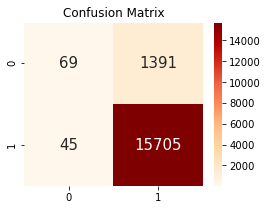

In [153]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

In [154]:
#negative가 275개가 되지 않아 50개로 줄임
positive_random_idx = review[review['y']==1].sample(300, random_state=12).index.tolist()
negative_random_idx = review[review['y']==0].sample(300, random_state=12).index.tolist()

In [155]:
random_idx = positive_random_idx + negative_random_idx
x = tf_idf_vect[random_idx]
y = review['y'][random_idx]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)


In [156]:
x_test.shape, y_test.shape

((150, 8871), (150,))

In [157]:
lr2 = LogisticRegression(random_state = 0)
lr2.fit(x_train, y_train)
y_pred = lr2.predict(x_test)

In [158]:
# classification result for test set

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))


accuracy: 0.65
precision: 0.64
recall: 0.68
F1: 0.66


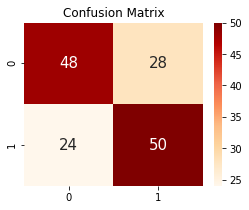

In [159]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()


In [160]:
#lr2.coef_

<BarContainer object of 8871 artists>

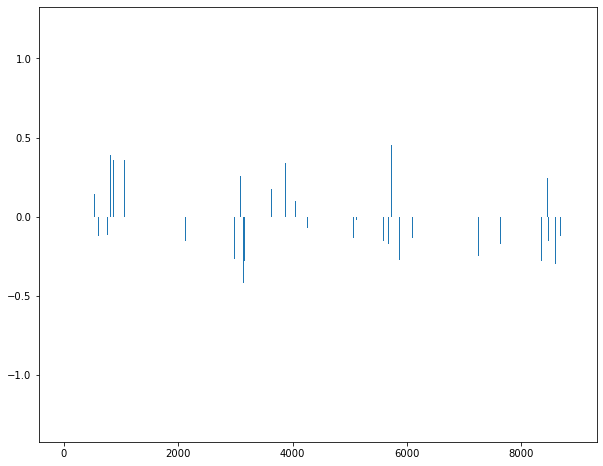

In [161]:
# print logistic regression's coef

plt.figure(figsize=(10, 8))
plt.bar(range(len(lr2.coef_[0])), lr2.coef_[0])


In [162]:
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[:5])
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[-5:])
# enumerate: 인덱스 번호와 컬렉션의 원소를 tuple형태로 반환함


[(1.2010966142782904, 2361), (0.90824854640201, 4266), (0.8891130989846434, 5135), (0.8620689829597978, 3826), (0.7771670839299328, 2909)]
[(-0.7821889577099617, 3229), (-0.9250427325885504, 3322), (-1.1294771134472603, 755), (-1.2008344666387774, 1522), (-1.299286520794621, 3890)]


In [163]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = False)
coef_pos_index


[(1.2010966142782904, 2361),
 (0.90824854640201, 4266),
 (0.8891130989846434, 5135),
 (0.8620689829597978, 3826),
 (0.7771670839299328, 2909),
 (0.7122338552224742, 7268),
 (0.6899184639792648, 5707),
 (0.6665949920919155, 5128),
 (0.6629714519809636, 5147),
 (0.6604698225080574, 2599),
 (0.6571478037884463, 3862),
 (0.6354704885609279, 1457),
 (0.621880104217954, 6527),
 (0.6190673669739463, 454),
 (0.6004298346726356, 3738),
 (0.5677894702942429, 3047),
 (0.55540130943912, 3860),
 (0.5207157127335058, 7219),
 (0.5144507370803417, 1130),
 (0.5045111370082702, 4074),
 (0.4978303259247194, 2649),
 (0.48810706310199814, 6683),
 (0.4853134425211495, 1448),
 (0.48493895608720855, 3442),
 (0.48278030269352523, 751),
 (0.47086851071888525, 8066),
 (0.46995879987144945, 7571),
 (0.4630904971123102, 20),
 (0.4539936117826099, 4651),
 (0.4518595906551621, 5728),
 (0.4439681182647548, 2170),
 (0.4410697403311646, 320),
 (0.4394136533166176, 8408),
 (0.42775201904168936, 3211),
 (0.42280190836838

In [164]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
invert_index_vectorizer


{1802: '두께',
 1941: '디자인',
 3856: '색감',
 3: '가격',
 3862: '색도',
 851: '기본',
 4063: '셔츠',
 3542: '빳빳',
 4091: '소재',
 5135: '여리해',
 3211: '보이',
 3890: '생각',
 7541: '커서',
 5116: '여기저기',
 7302: '청바지',
 4331: '슬랙스',
 7474: '치마',
 7501: '카라',
 5978: '이어도',
 2329: '마냥',
 2689: '무난',
 7882: '특성',
 6766: '주름',
 6291: '자켓',
 4640: '아유',
 1448: '다른',
 4136: '쇼핑몰',
 6963: '진짜',
 5115: '여기',
 6600: '제일',
 4254: '스커트',
 3156: '별로',
 3641: '사려',
 6630: '조금',
 1921: '등록',
 1256: '네이버',
 8030: '페이',
 655: '구매',
 2323: '링클',
 8161: '프리',
 5430: '옷감',
 641: '구김',
 6079: '일리',
 8159: '프롬',
 1685: '데이',
 6476: '전부',
 3738: '살짝',
 1809: '두운',
 7249: '채도',
 228: '개인',
 75: '가을',
 2725: '무엇',
 3874: '색상',
 2361: '마음',
 3450: '블루',
 8685: '홈페이지',
 3684: '사진',
 1385: '느낌',
 637: '구가',
 6406: '재질',
 8693: '화면',
 8357: '핑크색',
 352: '검정',
 4341: '슬렉스',
 4904: '어디',
 6281: '자주',
 5580: '요즘',
 1130: '날씨',
 3860: '색깔',
 5128: '여름',
 7406: '추가',
 6531: '정말',
 5399: '오피스',
 8066: '평소',
 1504: '단골',
 5169: '여태',
 6066: '

In [172]:
for coef in coef_pos_index[:100]:
    print(invert_index_vectorizer[coef[1]], coef[0])

마음 1.2010966142782904
스타일 0.90824854640201
여리해 0.8891130989846434
상의 0.8620689829597978
바짝 0.7771670839299328
처음 0.7122338552224742
원피스 0.6899184639792648
여름 0.6665949920919155
여성 0.6629714519809636
모두 0.6604698225080574
색도 0.6571478037884463
다만 0.6354704885609279
정도 0.621880104217954
고급 0.6190673669739463
살짝 0.6004298346726356
밴딩 0.5677894702942429
색깔 0.55540130943912
착용 0.5207157127335058
날씨 0.5144507370803417
소라색 0.5045111370082702
몸매 0.4978303259247194
존예 0.48810706310199814
다른 0.4853134425211495
블라우스 0.48493895608720855
그것 0.48278030269352523
평소 0.47086851071888525
코디 0.46995879987144945
가디건 0.4630904971123102
아주 0.4539936117826099
웨스트 0.4518595906551621
레이어 0.4439681182647548
걱정 0.4410697403311646
하이 0.4394136533166176
보이 0.42775201904168936
크게 0.42280190836838966
아무 0.4217082583894795
포인트 0.42049570030687283
고용 0.4154880363002317
패턴 0.40895379715470515
하비 0.4037187234478959
주변 0.4011122022644514
배부 0.3914432894275151
리하 0.38904529428211265
금방 0.3884052748233491
후크 0.386116241309

In [173]:
for coef in coef_neg_index[:100]:
    print(invert_index_vectorizer[coef[1]], coef[0])


생각 -1.299286520794621
단추 -1.2008344666387774
그냥 -1.1294771134472603
부분 -0.9250427325885504
보통 -0.7821889577099617
가슴 -0.7783417332996911
한번 -0.7142287123483688
커서 -0.6830061205019868
단독 -0.6816233527442471
퀄리티 -0.6745351554855734
느낌 -0.6238488646845058
등록 -0.6047050364175262
페이 -0.6046709372324798
네이버 -0.6046368445779677
지퍼 -0.5704222479365388
양말 -0.5498987032943651
냄새 -0.5412946258525996
가을 -0.537017970211733
자체 -0.5365480479253945
계속 -0.5305491070149304
편이 -0.5290108252082344
뱃살 -0.5282140507889594
속옷 -0.5117191129677675
구멍 -0.5095444716679123
뭔가 -0.5077647666527915
지금 -0.5057393108782146
소매 -0.4844365332364162
신경 -0.47035683826664354
별로 -0.45551116206987213
핑크 -0.4494434767601277
전체 -0.44586127924162594
브라 -0.4453599042214048
몸뚱이 -0.44320416249060446
쁘진 -0.44320416249060446
출근 -0.44320416249060446
배송비 -0.4382322469902115
잠옷 -0.42662487417356043
쇼핑몰 -0.42524264558219294
초가을 -0.42124086443190145
벨트 -0.41982780631479516
살집 -0.41817314106437586
어깨 -0.41668712193279855
왤케 -0.413273126451